In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-funnel-olist/olist_closed_deals_dataset.csv
/kaggle/input/marketing-funnel-olist/olist_marketing_qualified_leads_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv


# 1. reading and viewing the data

## reviews

In [3]:
reviews = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv")
reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


## sellers

In [4]:
sellers = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv")
sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


## geolocation dataset

In [5]:
geolocation = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv")
geolocation.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


## payments dataset

In [6]:
payments = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv")
payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


## products dataset

In [7]:
products = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv")
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


## orders dataset

In [8]:
orders = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv")
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


## order items dataset

In [9]:
order_items = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv")
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


## item translation sheet

In [10]:
translate = pd.read_csv("/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv")
translate.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


## customers dataset

In [11]:
customers = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


# 2. processing data

## Joining/Merging

In [12]:
#left join products with order items
ordermerge = order_items.merge(products, on='product_id', how='left')
ordermerge = ordermerge.merge(translate, on = 'product_category_name', how = 'left')

# 2. EDA

## product groups with the most sales

In [13]:

ordermerge.product_category_name_english.value_counts().head()

bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
Name: product_category_name_english, dtype: int64

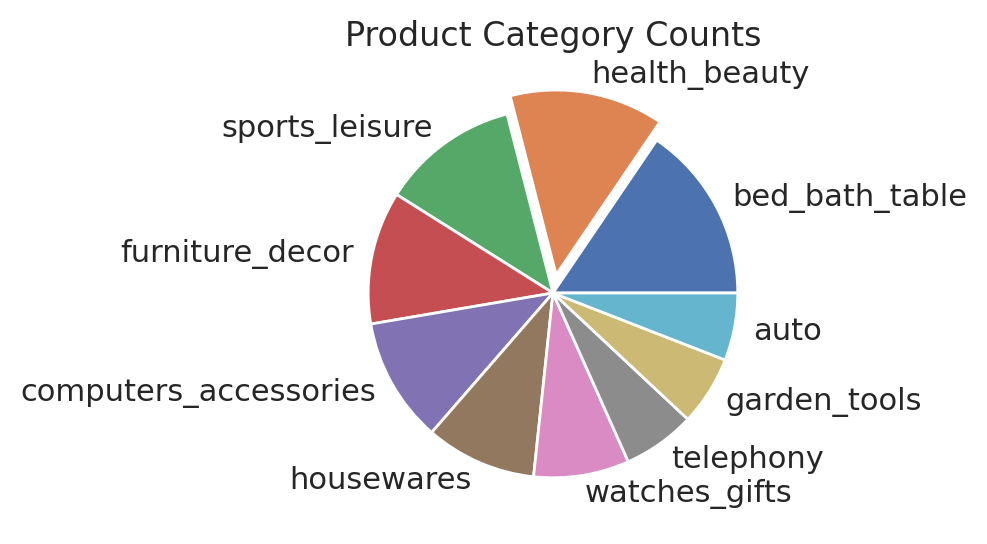

In [43]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=200)
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(x = ordermerge.product_category_name_english.value_counts().head(10), explode = explode, shadow = False,
        labels = ordermerge.product_category_name_english.value_counts().head(10).index.tolist())
plt.title("Product Category Counts")
plt.show()

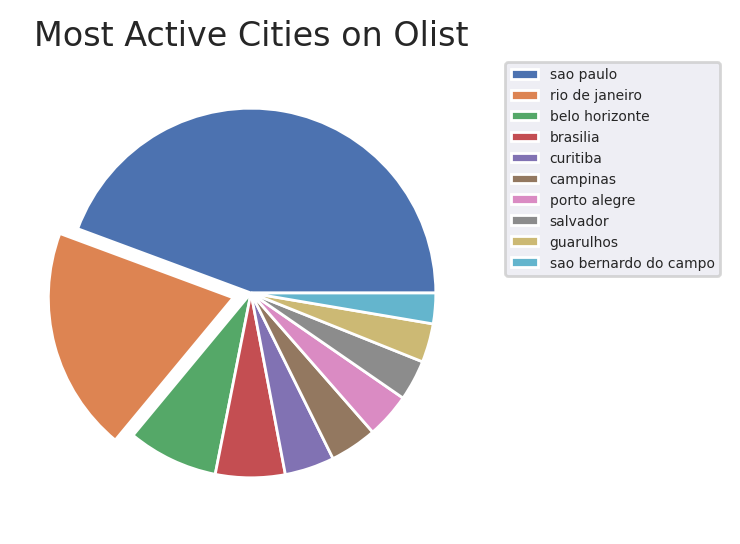

In [42]:
#popular cities
fig, ax = plt.subplots(figsize=(3, 3), dpi=200)
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(x = customers['customer_city'].value_counts().head(10), explode = explode, shadow = False, 
        labels = ["","","","","","","","","",""])
plt.legend(labels = customers.customer_city.value_counts().head(10).index.tolist(), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize = 5)
plt.title("Most Active Cities on Olist")
plt.show()

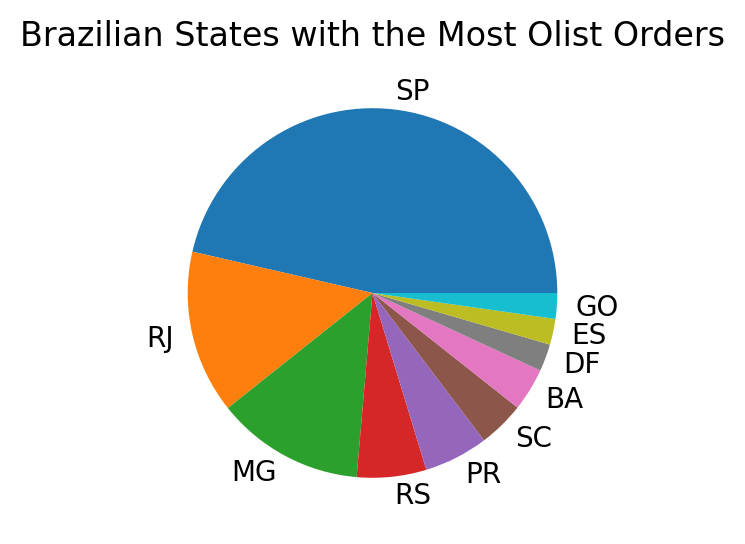

In [16]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=200)
plt.pie(x = customers.customer_state.value_counts().head(10), 
        labels = customers.customer_state.value_counts().head(10).index.tolist())
plt.title("Brazilian States with the Most Olist Orders")
plt.show()

In [17]:
#orders by day
orders['order_day'] = orders.order_purchase_timestamp.apply(lambda x: x.split(" ")[0])
orders_per_day = pd.DataFrame(orders.order_day.value_counts())
#ten most popular days for orders
orders_per_day.head(10)

,order_day
2017-11-24,1176
2017-11-25,499
2017-11-27,403
2017-11-26,391
2017-11-28,380
2018-08-06,372
2018-05-07,372
2018-08-07,370
2018-05-14,364
2018-05-16,357


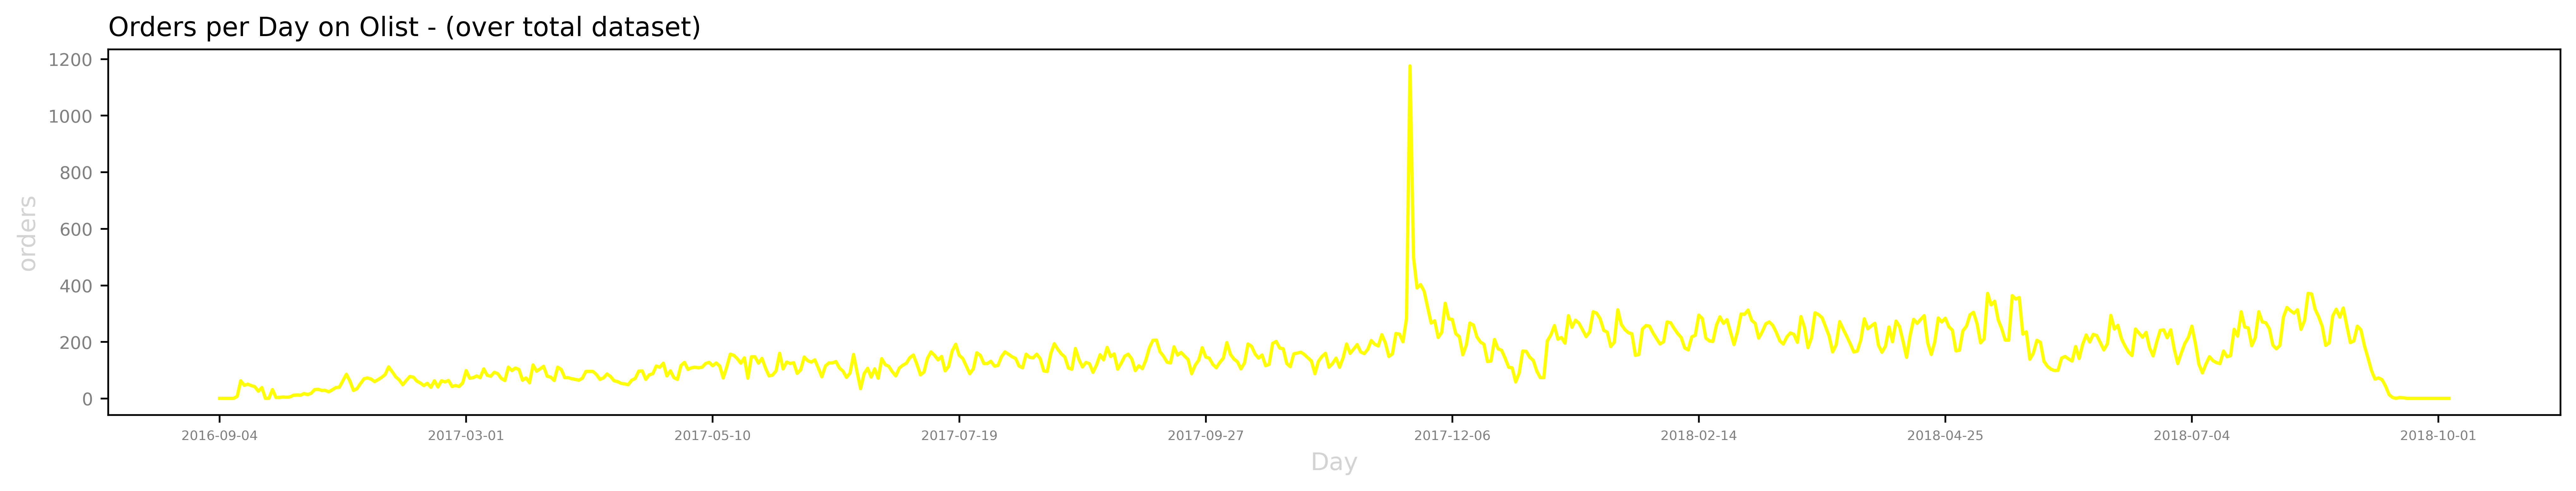

In [18]:
orders_per_day = orders_per_day.sort_index()
fig, ax = plt.subplots(figsize=(20, 3), dpi=500)
sns.lineplot(x = orders_per_day.index, y = orders_per_day.order_day, color = 'yellow')
plt.xticks([])
csfont = {'fontname':'swag'}
plt.xlabel('Day', fontsize = '11', color = 'lightgrey')
plt.ylabel('orders', fontsize = '11', color = 'lightgrey')
#locs, labels = xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, 650, step=70), fontsize = 6, color = 'grey')  # Set label locations.
plt.yticks(fontsize = 8, color = 'grey')
#plt.xticks(np.arange(3), ['Tom', 'Dick', 'Sue'])  # Set text labels.
plt.title("Orders per Day on Olist - (over total dataset)",**csfont, loc = 'left')
plt.grid(linestyle=' ', alpha=0.7)
plt.show()

<AxesSubplot:title={'center':'Order Cost Distribution - Price per Order'}, xlabel='price', ylabel='Count'>

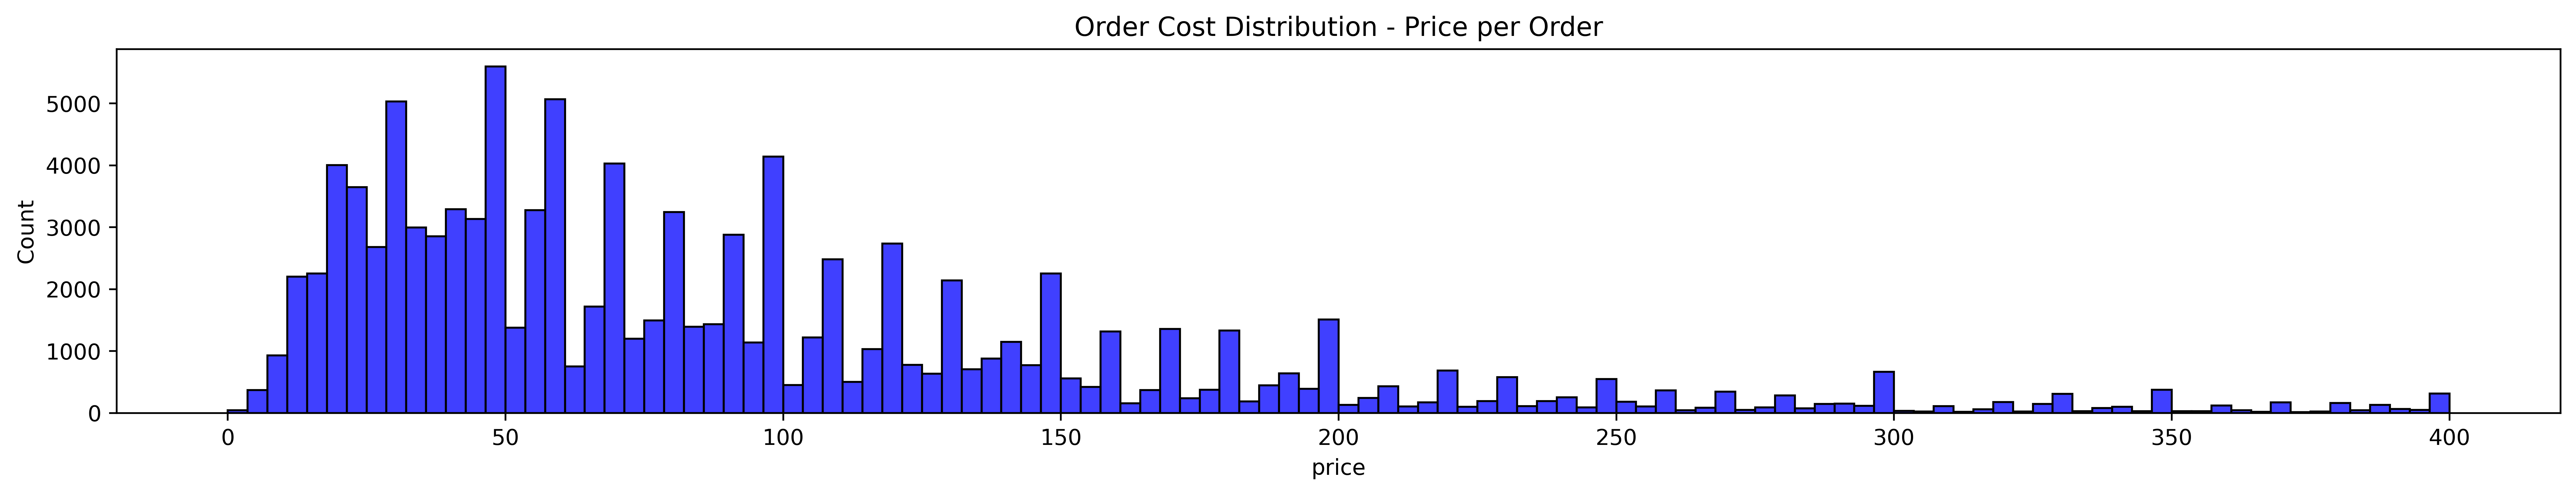

In [19]:
#price_per_order distr
fig, ax = plt.subplots(figsize=(20, 3), dpi=500)
sns.set_style(rc = {'axes.facecolor': 'black'})
plt.title("Order Cost Distribution - Price per Order")
plt.grid(linestyle=' ', alpha=0.7)
sns.histplot(order_items.price, binrange = (0,400), color = 'blue')

In [20]:
order_items.price.mean()

120.65373901464716

In [21]:
#two lines of the yearly purchases for comparison
test = orders_per_day.reset_index()
#test['index'] = test['index'].apply(lambda x: x.split("-"))

In [22]:
test2 = test[test['index'] >= "2017-09-05"]
test2 = test2[test2['index'] <= "2018-09-05"]
test2
test3 = test[test['index'] < "2017-09-05"]
test2['index'] = pd.to_datetime(test2['index'], format='%Y-%m-%d')
test3['index'] = pd.to_datetime(test3['index'], format='%Y-%m-%d')
test2['index'] = test2['index'].dt.strftime('%m-%d')
test3['index'] = test3['index'].dt.strftime('%m-%d')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


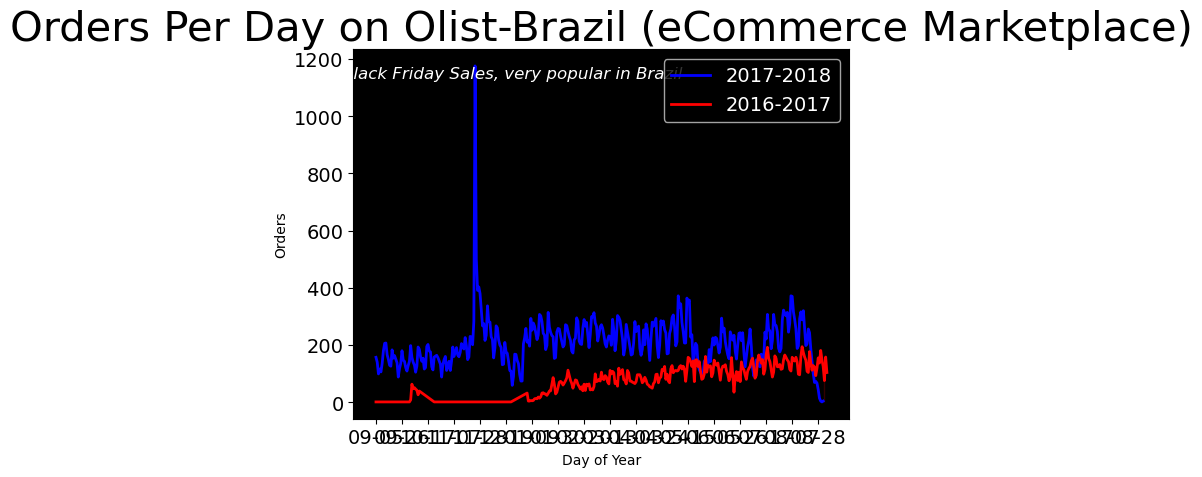

In [23]:
sns.set_style(rc = {'axes.facecolor': 'black'})
sns.lineplot(x = test2['index'], y = test2.order_day, label='2017-2018', color = 'blue', linewidth = 2)
sns.lineplot(x = test3['index'], y = test3.order_day, label='2016-2017', color = 'red', linewidth = 2)
plt.xticks([])
plt.xticks(np.arange(0, 358, step=21)) 
plt.xlabel('Day of Year')
plt.ylabel('Orders')
plt.title("Orders Per Day on Olist-Brazil (eCommerce Marketplace)", fontsize = 30)
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=14, labelcolor = 'white')
plt.text(110, 1150, "Black Friday Sales, very popular in Brazil", 
       fontsize = 12,          # Size
       fontstyle = "oblique",  # Style
       color = "white",          # Color
       ha = "center", # Horizontal alignment
       va = "center") 
plt.grid(linestyle=' ', alpha=0.7)
plt.show()

^ Black Friday has been mimicked in Brazil and is very popular there. 

In [24]:
geolocation['count'] = 1
geolocation[geolocation.index > 999990]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,count
999991,99900,-27.882068,-52.227670,getulio vargas,RS,1
999992,99930,-27.914195,-52.259797,estacao,RS,1
999993,99900,-27.881965,-52.231649,getulio vargas,RS,1
999994,99930,-27.915710,-52.260629,estacao,RS,1
999995,99950,-28.072470,-52.017722,tapejara,RS,1
...,...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS,1
1000159,99900,-27.877125,-52.224882,getulio vargas,RS,1
1000160,99950,-28.071855,-52.014716,tapejara,RS,1
1000161,99980,-28.388932,-51.846871,david canabarro,RS,1


In [25]:
#geolocation
#fig = px.density_mapbox(geolocation, lat='geolocation_lat', lon='geolocation_lng', z='count', mapbox_style="stamen-terrain")
 
#fig

In [26]:
ordermerge

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories


In [27]:
test

,index,order_day
0,2016-09-04,1
1,2016-09-05,1
2,2016-09-13,1
3,2016-09-15,1
4,2016-10-02,1
...,...,...
629,2018-09-29,1
630,2018-10-01,1
631,2018-10-03,1
632,2018-10-16,1


In [28]:
#information about orders
#     time it takes to approve, time it takes to ship, etc

duration = orders[['order_purchase_timestamp', 'order_delivered_customer_date']]
duration['order_purchase_timestamp'] = pd.to_datetime(duration['order_purchase_timestamp'])
duration['order_delivered_customer_date'] = pd.to_datetime(duration['order_delivered_customer_date'])
test = duration.order_purchase_timestamp - duration.order_delivered_customer_date
test = test.apply(lambda x: -1* (x.days))
test.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


13.094075210415026

In [29]:
test2 = test[test > 60]
test2

252       82.0
658       76.0
1536      67.0
1563      75.0
1621     111.0
         ...  
97290     67.0
97899     73.0
97961     67.0
98227    105.0
98721     69.0
Length: 306, dtype: float64

In [30]:
test = test[test < 60]

<AxesSubplot:ylabel='Count'>

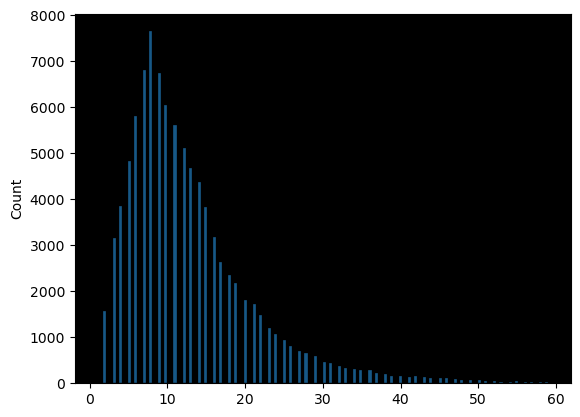

In [31]:
sns.histplot(test)

<AxesSubplot:ylabel='Count'>

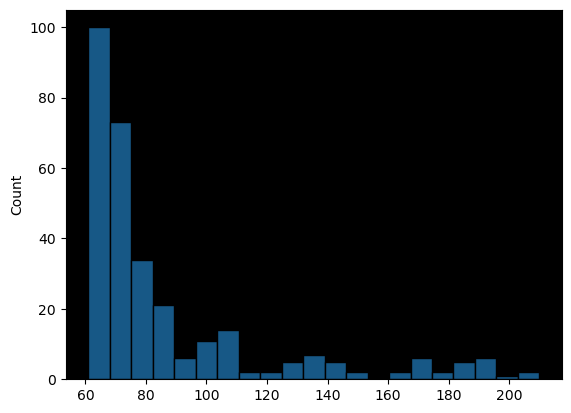

In [32]:
sns.histplot(test2)

In [33]:
cd = pd.read_csv('/kaggle/input/marketing-funnel-olist/olist_closed_deals_dataset.csv')
mql = pd.read_csv('/kaggle/input/marketing-funnel-olist/olist_marketing_qualified_leads_dataset.csv')

In [34]:
leads = mql.merge(cd, on = 'mql_id', how = 'left')
leads

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,feaba3ffcd2ff97501696c7f9a42f41c,2018-05-22,e42a14209c69c3e9cc6b042620465f12,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7996,a79cb53cd009ab92e0143b92baa2407b,2018-03-27,c494978688ccf66ad9fad3d6a3338c22,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7997,68f049a23ab109c6a0f6989bb9a02994,2017-08-27,b48ec5f3b04e9068441002a19df93c6c,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7998,4f8c96e2509b984329044c6682c88ee9,2017-10-06,a56671a54260a44923d32c2f08fad39c,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
rel_conversion_rate = len(cd)/len(leads)
rel_conversion_rate

0.10525

In [36]:
store = pd.DataFrame(leads.groupby('origin').apply(lambda x: len(x[x.won_date.isna() == False]) / len(x))).reset_index()

In [37]:
#sns.heatmap(store.sort_values(by = '))

In [38]:
conv = store.iloc[:,1]
store['conversion_rate'] = conv
store = store[['origin', 'conversion_rate']]

# Conversion rates by marketing channel. Here are the origin sources and their conversion rates.

<AxesSubplot:ylabel='origin'>

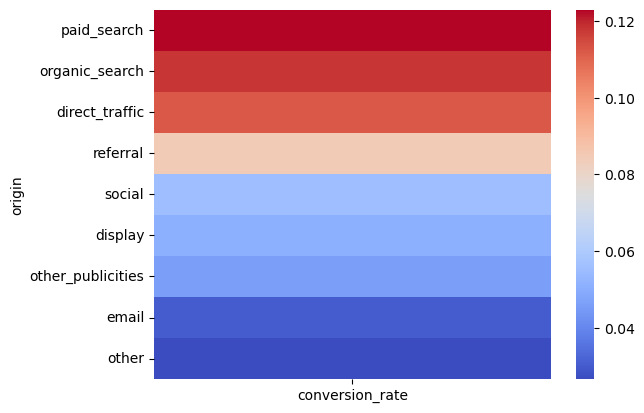

In [39]:
store = store.set_index(store.origin)
store.drop('origin', axis = 1, inplace=True)
store.drop('unknown', axis = 0, inplace = True)
sns.heatmap(store.sort_values(by = 'conversion_rate', ascending = False), cmap = 'coolwarm') 

<AxesSubplot:title={'center':'Distribution of conversion rates'}, xlabel='Type', ylabel='# of leads'>

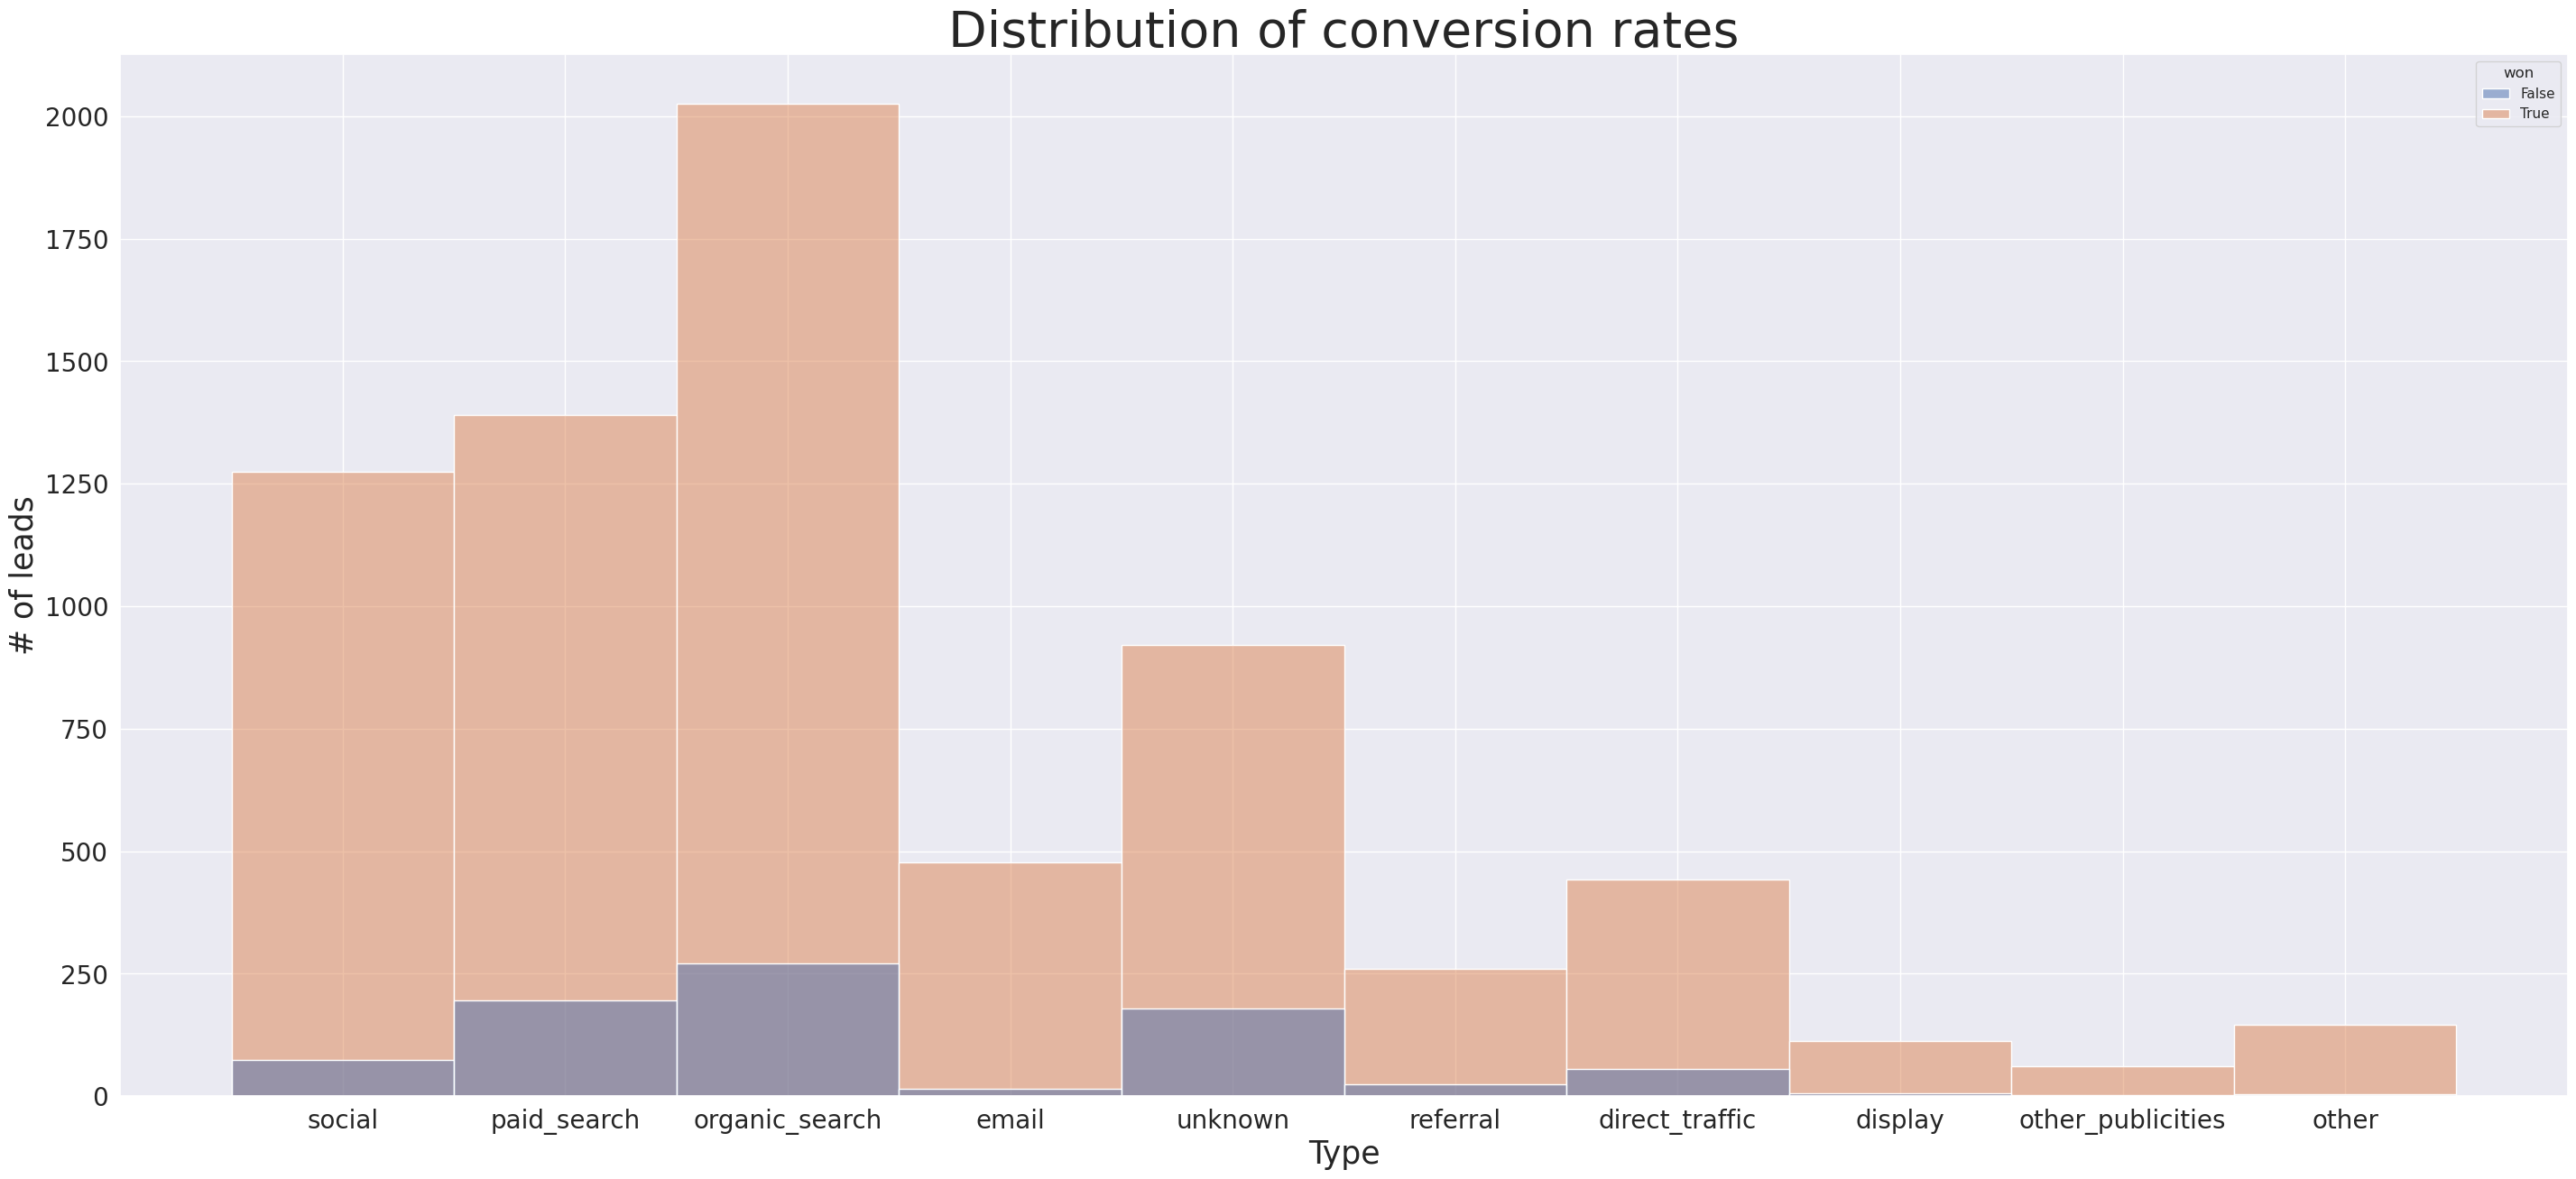

In [40]:
# change color and add title
sns.set(rc={'figure.figsize':(35, 15)})
leads['won'] = leads.won_date.isna()
plt.xticks(fontsize = 20), plt.xlabel("Type", fontsize = 25)
plt.yticks(fontsize = 20), plt.ylabel("# of leads", fontsize = 25)
plt.title("Distribution of conversion rates", fontsize = 40)
sns.histplot(data=leads, x="origin", color = 'green', hue = 'won')